In [28]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [29]:
import glob

In [33]:
train_files=glob.glob("C:/Users/TANIL GUPTA/Downloads/archive/flowers/*/**")

In [34]:
from random import shuffle
shuffle( train_files)
train_files

['C:/Users/TANIL GUPTA/Downloads/archive/flowers\\6\\3450822975_7e77d67636_c.jpg',
 'C:/Users/TANIL GUPTA/Downloads/archive/flowers\\8\\17055239312_39870dfb23_c.jpg',
 'C:/Users/TANIL GUPTA/Downloads/archive/flowers\\1\\26565157823_d4d63e09cd_c.jpg',
 'C:/Users/TANIL GUPTA/Downloads/archive/flowers\\8\\4540402770_91c8337608_c.jpg',
 'C:/Users/TANIL GUPTA/Downloads/archive/flowers\\6\\13359594024_042f77eb7f_c.jpg',
 'C:/Users/TANIL GUPTA/Downloads/archive/flowers\\0\\4666900908_97ef1f06ce_c.jpg',
 'C:/Users/TANIL GUPTA/Downloads/archive/flowers\\D\\6053847210_45df0615d3_c.jpg',
 'C:/Users/TANIL GUPTA/Downloads/archive/flowers\\A\\4724438292_1e8f463fc0_c.jpg',
 'C:/Users/TANIL GUPTA/Downloads/archive/flowers\\D\\1236911294_5bf65bc438_c.jpg',
 'C:/Users/TANIL GUPTA/Downloads/archive/flowers\\0\\26922602863_d7a5487445_c.jpg',
 'C:/Users/TANIL GUPTA/Downloads/archive/flowers\\4\\33479368506_770a7d926a_c.jpg',
 'C:/Users/TANIL GUPTA/Downloads/archive/flowers\\D\\1109359641_39f2b5a33d_c.jpg',

In [24]:
from PIL import Image

In [62]:
X_train=np.zeros((len(train_files),64,64,3))
Y_train=np.zeros((len(train_files)))

for i,fl in enumerate(train_files):
    img = Image.open(fl)
    img = img.resize((64,64))
    arr = np.array(img)
    
    #image pixels normalized
    arr = arr/255
    
    
    if arr.shape == (64,64,3): #arrays that have other shape cannot fit in X_train
        X_train[i,:,:,:]=arr   
    d = fl[47]  
   
    if (d>='A' and d < 'Z'):
            if (d=='A') :
                Y_train[i] = 10
            elif (d=='B') :
                Y_train[i] = 11
            elif (d=='C'):
                Y_train[i] = 12
            elif (d=='D') :
                Y_train[i] = 13
            elif (d=='E') :
                Y_train[i] = 14
            elif (d=='F') :Y_train[i] = 15
    else :
            Y_train[i] = d

In [42]:
from matplotlib import pyplot as plt

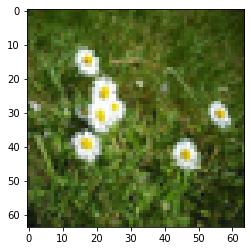

In [43]:
plt.imshow(X_train[0])

In [59]:
np.count_nonzero(Y_train == 0)

9582

In [47]:
from keras import layers, Sequential

In [48]:
from keras.layers import Conv2D, Dense, Flatten

In [49]:
import keras_tuner

In [50]:
from keras_tuner import engine
from keras_tuner.engine.hyperparameters import HyperParameters as hp

In [83]:
def build_model(hp):  
  model = keras.Sequential([
    #keras.layers.Conv2D(128,(3,3), strides=1,padding= 'Same', activation='relu',input_shape=(64,64,3)),
    #keras.layers.Conv2D(128,(3,3), strides=1,padding= 'Same', activation='relu'),
    #keras.layers.MaxPooling2D((2,2),strides = 2),
    #keras.layers.Conv2D(256,(3,3), strides=1,padding= 'Same', activation='relu'),
    #keras.layers.Conv2D(256,(3,3), strides=1,padding= 'Same', activation='relu'),
    #keras.layers.MaxPooling2D((2,2),strides = 2),
    #keras.layers.Dropout((0.5)), 
      
      
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),#min value of filter you want
        kernel_size=hp.Choice('conv_1_kernel', values = [2,4]),#picks like mcq
        activation='relu',
        input_shape=(64,64,3)
        
    ),
    keras.layers.Dropout((0.5)),
      #for i in range(0,hp.Int(....)) this will also work
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),# ihave added this line extra in comparison to the old model
        kernel_size=hp.Choice('conv_2_kernel', values = [2,3]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
   # keras.layers.Dense(28, activation='sigmoid'),
   # keras.layers.Dense(28, activation='relu'),
    
    keras.layers.Dense(16, activation='softmax')
  ])
    
  
  model.compile(optimizer=keras.optimizers.Adam(learning_rate = 1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [85]:
tuner_search=keras_tuner.RandomSearch(
    build_model,
    objective='accuracy',
    max_trials=6,
    directory='output4',
)

In [ ]:
tuner_search.search(X_train, Y_train, epochs=2, validation_split=0.2)

Trial 2 Complete [00h 07m 26s]
accuracy: 0.3233799338340759

Best accuracy So Far: 0.4253494143486023
Total elapsed time: 00h 10m 03s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
128               |32                |conv_1_filter
2                 |4                 |conv_1_kernel
64                |32                |conv_2_filter
2                 |2                 |conv_2_kernel
128               |112               |dense_1_units

Epoch 1/2
394/394 [==============================] - ETA: 0s - loss: 2.1793 - accuracy: 0.3093

In [ ]:
model = tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

In [ ]:
model.fit(X_train, Y_train, epochs=5, validation_split=0.2, initial_epoch=2)